In [94]:
import numpy as np
import os

In [60]:
def initialize_centroid(X, k):
    index = np.random.choice(len(X),size=k,replace=False)
    return X[index]

In [61]:
def compute_z(X, centroids):
    N = len(X)
    k = len(centroids)
    z = np.zeros((N,k))
    for i in range(N):
        sq_diff = (X[i] - centroids)**2
        distances = np.sum(sq_diff, axis=1)
        nearest_k = np.argmin(distances)
        z[i, nearest_k] = 1
    return z

In [62]:
def update_centroids(X,z):
    N,D = X.shape
    k = z.shape[1]
    centroids = np.zeros((k,D))
    
    for i in range(k):
        points = X[z[:,i]==1]
        if len(points)>0:
            centroids[i] = np.mean(points, axis=0)
    return centroids

In [63]:
def compute_distoration(X, centroids, z):
    J = 0.0
    for n in range(len(X)):
        for k in range(len(centroids)):
            sq_diff = (X[n] - centroids[k])**2
            distance = np.sum(sq_diff)
            J += z[n,k]*distance
    return J

In [64]:
def kmeans(X,k,threshold=1e-4):
    centroids = initialize_centroid(X,k)
    J_old = 1e+999
    iteration = 0
    while True:
        z = compute_z(X, centroids)
        centroids = update_centroids(X,z)
        J = compute_distoration(X, centroids, z)
        iteration+=1
        print(f"Iteration {iteration}, Distortion (J): {J}")
        print(abs(J_old - J),abs(J_old - J)< threshold)
        if abs(J_old - J)< threshold:
            print("Converged!!")
            break
        J_old = J
    return centroids, z

In [65]:
def predict(X_new, centroids):
    if (X_new.shape[1]!=centroids.shape[1]):
        print('Error!! Dimention not matching')
        return
    
    m = X_new.shape[0]
    k = centroids.shape[0]
    distances = np.zeros((m,k))
    
    for i in range(k):
        diff = X_new - centroids[i]
        sq_dist = np.sum(diff ** 2, axis=1)
        distances[:, i] = sq_dist
        
    labels = np.argmin(distances, axis=1)
    return labels

In [135]:
import numpy as np
import os

def load_train_test_datasets(base_folder):
    def load_folder(folder):
        data = []
        files = os.listdir(folder)
        for file in files:
            if file.endswith(".txt"):
                path = os.path.join(folder, file)
                print(path)
                points = np.loadtxt(path, delimiter=' ')
                data.append(points)
        return np.vstack(data)

    train_folder = os.path.join(base_folder, "train")
    test_folder = os.path.join(base_folder, "test")
    
    X_train = load_folder(train_folder)
    X_test = load_folder(test_folder)

    return X_train, X_test

import numpy as np
import os

def load_train_test_datasets(base_folder):
    def load_folder(folder):
        data = []
        labels = []
        class_map = {}  # Maps class name to label (e.g. 'class1' → 0)

        files = [f for f in os.listdir(folder) if f.endswith(".txt")]
        files.sort()  # Optional: for consistent ordering

        for file in files:
            path = os.path.join(folder, file)
            parts = file.split("_")
            class_name = parts[0]  # 'class1' from 'class1_train.txt'

            # Assign numeric label to class name
            if class_name not in class_map:
                class_map[class_name] = len(class_map)  # auto-labeling

            label = class_map[class_name]

            points = np.loadtxt(path, delimiter=' ')
            data.append(points)
            labels.append(np.full(len(points), label))

        return np.vstack(data), np.hstack(labels), class_map

    train_folder = os.path.join(base_folder, "train")
    test_folder = os.path.join(base_folder, "test")

    X_train, y_train, class_map = load_folder(train_folder)
    X_test, y_test, _ = load_folder(test_folder)  # test uses same class_map, but we ignore it

    return X_train, y_train, X_test, y_test, class_map


In [142]:
X_train.shape, y_train.shape

((1260, 2), (1260,))

In [68]:
import numpy as np
np.random.seed(0)

# Step 1: Generate training data
# X_train = np.vstack([
#     np.random.randn(50, 2) + np.array([2, 2]),
#     np.random.randn(50, 2) + np.array([-2, -2]),
#     np.random.randn(50, 2) + np.array([2, -2])
# ])

# Step 2: Train k-means
final_centroids, cluster_assignments = kmeans(X_train, k=3)

# Step 3: New data to predict
# X_new = np.array([
#     [3, 3],
#     [-3, -3],
#     [2, -3],
#     [0, 0]
# ])
X_new = X_test

# Step 4: Predict cluster labels for new data
predicted_labels = predict(X_new, final_centroids)

# Output the result
print("Predicted cluster labels for new data:")
for i, label in enumerate(predicted_labels):
    print(f"Point {X_new[i]} -> Cluster {label}")


Iteration 1, Distortion (J): 9750.911440211106
inf False
Iteration 2, Distortion (J): 8196.160734195817
1554.7507060152893 False
Iteration 3, Distortion (J): 7775.491848069604
420.6688861262128 False
Iteration 4, Distortion (J): 7574.162746345656
201.32910172394804 False
Iteration 5, Distortion (J): 7441.562961142799
132.59978520285676 False
Iteration 6, Distortion (J): 7409.015303097915
32.547658044883974 False
Iteration 7, Distortion (J): 7403.080226503678
5.935076594237216 False
Iteration 8, Distortion (J): 7402.776021328274
0.30420517540460423 False
Iteration 9, Distortion (J): 7402.5991596293325
0.17686169894113846 False
Iteration 10, Distortion (J): 7402.471036142682
0.12812348665011086 False
Iteration 11, Distortion (J): 7402.471036142682
0.0 True
Converged!!
Predicted cluster labels for new data:
Point [-0.26775   0.205901] -> Cluster 2
Point [-0.377693 -0.324248] -> Cluster 2
Point [0.188944 0.25748 ] -> Cluster 2
Point [ 0.227587 -0.259231] -> Cluster 2
Point [-0.190176 -0.19

Iteration 1, Distortion (J): 15865.08012138234
inf False
Iteration 2, Distortion (J): 15865.08012138234
0.0 True
Converged!!
Iteration 1, Distortion (J): 10781.915938509623
inf False
Iteration 2, Distortion (J): 10511.935507754744
269.9804307548784 False
Iteration 3, Distortion (J): 10452.282774946463
59.652732808281144 False
Iteration 4, Distortion (J): 10419.50127824404
32.78149670242237 False
Iteration 5, Distortion (J): 10400.674694044641
18.826584199399804 False
Iteration 6, Distortion (J): 10385.68024670286
14.994447341781779 False
Iteration 7, Distortion (J): 10375.169577038829
10.510669664030502 False
Iteration 8, Distortion (J): 10368.16699631699
7.002580721838967 False
Iteration 9, Distortion (J): 10365.998679203836
2.1683171131535346 False
Iteration 10, Distortion (J): 10365.825150010212
0.17352919362383545 False
Iteration 11, Distortion (J): 10365.825150010212
0.0 True
Converged!!
Iteration 1, Distortion (J): 10328.07239716536
inf False
Iteration 2, Distortion (J): 8629.391

Iteration 6, Distortion (J): 1971.217767144631
71.79087711041416 False
Iteration 7, Distortion (J): 1924.4033476750349
46.81441946959603 False
Iteration 8, Distortion (J): 1916.7611193719767
7.642228303058118 False
Iteration 9, Distortion (J): 1913.856091103144
2.905028268832666 False
Iteration 10, Distortion (J): 1910.2550044656339
3.601086637510207 False
Iteration 11, Distortion (J): 1907.6457145767395
2.609289888894409 False
Iteration 12, Distortion (J): 1905.1141437720694
2.531570804670082 False
Iteration 13, Distortion (J): 1903.165082354707
1.9490614173623726 False
Iteration 14, Distortion (J): 1903.165082354707
0.0 True
Converged!!


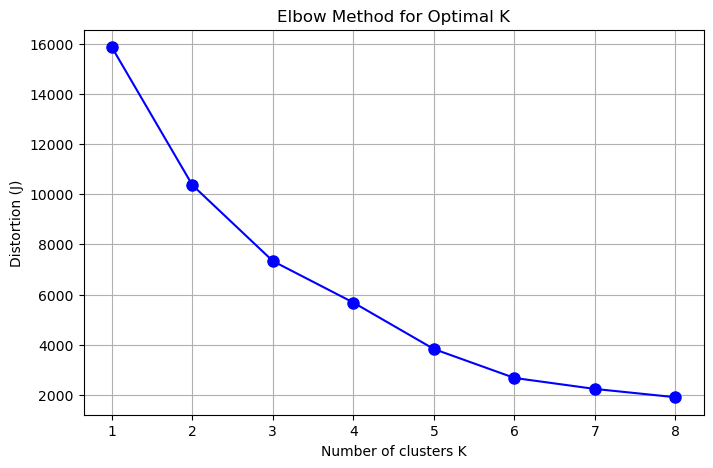

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data (3 clusters)
# np.random.seed(42)
# X = np.vstack([
#     np.random.randn(50, 2) + np.array([2, 2]),
#     np.random.randn(50, 2) + np.array([-2, -2]),
#     np.random.randn(50, 2) + np.array([2, -2])
# ])

# Step 2: Try different values of K
distortions = []
K_values = range(1,9)  # Try K = 1 to 9

for k in K_values:
    centroids, z = kmeans(X_train, k)
    J = compute_distoration(X_train, centroids, z)
    distortions.append(J)

# Step 3: Plot K vs Distortion
plt.figure(figsize=(8, 5))
plt.plot(K_values, distortions, 'bo-', markersize=8)
plt.xlabel('Number of clusters K')
plt.ylabel('Distortion (J)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


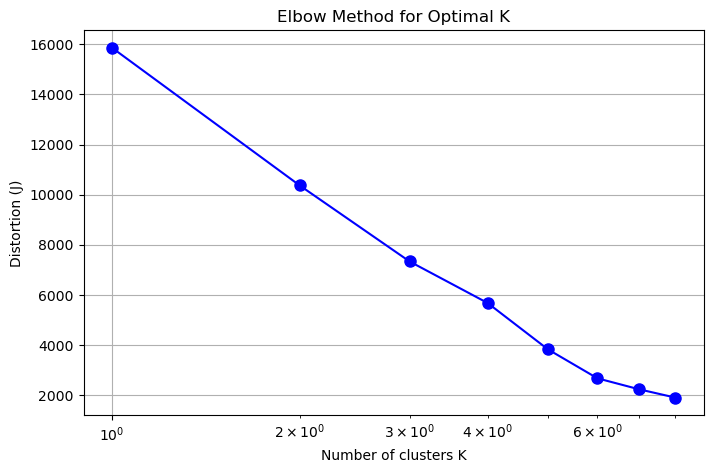

In [70]:
plt.figure(figsize=(8, 5))
plt.plot(K_values, distortions, 'bo-', markersize=8)
plt.xscale('log') 
plt.xlabel('Number of clusters K')
plt.ylabel('Distortion (J)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [71]:
# import numpy as np

# def initialize_centroids(X, k):
#     indices = np.random.choice(len(X), size=k, replace=False)
#     return X[indices]

# def compute_z(X, centroids):
#     N = len(X)
#     K = len(centroids)
#     z = np.zeros((N, K))

#     for n in range(N):
#         distances = np.linalg.norm(X[n] - centroids, axis=1) ** 2
#         closest_k = np.argmin(distances)
#         z[n, closest_k] = 1
#     return z

# def update_centroids(X, z, k):
#     N, D = X.shape
#     centroids = np.zeros((k, D))

#     for i in range(k):
#         points = X[z[:, i] == 1]
#         if len(points) > 0:
#             centroids[i] = np.mean(points, axis=0)
#     return centroids

# def compute_distortion(X, centroids, z):
#     J = 0.0
#     for n in range(len(X)):
#         for k in range(len(centroids)):
#             if z[n, k] == 1:
#                 J += np.linalg.norm(X[n] - centroids[k]) ** 2
#     return J

# def kmeans(X, k, max_iters=100, tol=1e-4):
#     centroids = initialize_centroids(X, k)
#     prev_J = None

#     for iteration in range(max_iters):
#         z = compute_z(X, centroids)
#         centroids = update_centroids(X, z, k)
#         J = compute_distortion(X, centroids, z)

#         print(f"Iteration {iteration}, Distortion (J): {J:.4f}")

#         if prev_J is not None and abs(prev_J - J) < tol:
#             print("Converged based on distortion difference.")
#             break

#         prev_J = J

#     return centroids, z
# def predict(X_new, centroids):
#     distances = np.zeros((X_new.shape[0], centroids.shape[0]))
#     for i, centroid in enumerate(centroids):
#         distances[:, i] = np.linalg.norm(X_new - centroid, axis=1) ** 2
#     labels = np.argmin(distances, axis=1)
#     return labels


In [72]:
def gaussian_pdf(x, mean, cov):
    d = x.shape[0]
    x_mu = x-mean
    cov_reg = cov + 1e-6 * np.eye(d)
    cov_det = np.linalg.det(cov_reg)
    cov_inv = np.linalg.inv(cov_reg)
    a = 1/ (np.power(2*np.pi,d/2)*np.sqrt(cov_det+ 1e-6))
    exponent = -0.5 * np.dot(x_mu.T,np.dot(cov_inv, x_mu))
    return a * np.exp(exponent)

In [73]:
def initialize_gmm(X,k):
    n_samples, n_features = X.shape
    index = np.random.choice(len(X),size=k,replace=False)
    means = X[index]
#     covariances = [np.cov(X, rowvar=False) for _ in range(k)] 
    covariances = [np.cov(X, rowvar=False) + 1e-6 * np.eye(n_features) for _ in range(k)]
    weights = np.ones(k)/k
    return means, covariances, weights

In [74]:
def e_step(X, means, covariances, weights, k):
    n_samples = X.shape[0]
    responsibilities = np.zeros((n_samples, k))
    for i in range(k):
        for n in range(n_samples):
            responsibilities[n,i] = weights[i]*gaussian_pdf(X[n], means[i], covariances[i])
    responsibilities_sum = responsibilities.sum(axis=1, keepdims=True)
    responsibilities = responsibilities / responsibilities_sum
    return responsibilities

In [75]:
def m_step(X, responsibilities, k):
    n_samples, n_features = X.shape
    Nk = responsibilities.sum(axis=0)
    weights = Nk/n_samples
    means = np.zeros((k,n_features))
    covariances = []
    for i in range(k):
        means[i] = (responsibilities[:, i][:, np.newaxis] * X).sum(axis=0) / Nk[i]
        diff = X - means[i]
        cov = np.dot((responsibilities[:, i][:, np.newaxis] * diff).T, diff) / Nk[i]
        cov += 1e-6 * np.eye(n_features) 
        covariances.append(cov)
    return means, covariances, weights

In [114]:
def compute_log_likelihood(X, means, covariances, weights, k):
    n_samples = X.shape[0]
    likelihood = np.zeros((n_samples, k))
    for i in range(k):
        for n in range(n_samples):
            likelihood[n, i] = weights[i] * gaussian_pdf(X[n], means[i], covariances[i])
#         log_likelihood = np.sum(np.log(np.sum(likelihood, axis=1))) 
            log_likelihood = np.sum(np.log(np.sum(likelihood, axis=1) + 1e-6))
        return log_likelihood

In [77]:
def plot_log_likelihood(log_likelihoods):
    plt.plot(log_likelihoods, marker='o')
    plt.title("GMM Training - Log Likelihood over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Log Likelihood")
    plt.grid(True)
    plt.show()


In [78]:
def predict_gmm(X, means, covariances, weights):
    k = len(means)
    n_samples = X.shape[0]
    responsibilities = np.zeros((n_samples, k))
    for i in range(k):
        for n in range(n_samples):
            responsibilities[n, i] = weights[i] * gaussian_pdf(X[n], means[i], covariances[i])
    responsibilities_sum = responsibilities.sum(axis=1, keepdims=True)
    responsibilities /= responsibilities_sum
    return np.argmax(responsibilities, axis=1)

In [151]:
import numpy as np
np.random.seed(0)

# Step 1: Generate training data
# X_train = np.vstack([
#     np.random.randn(50, 2) + np.array([2, 2]),
#     np.random.randn(50, 2) + np.array([-2, -2]),
#     np.random.randn(50, 2) + np.array([2, -2])
# ])

# Step 2: Train k-means
means, covariances, weights, responsibilities = gmm(X_train, k=3)

# Step 3: New data to predict
# X_new = np.array([
#     [3, 3],
#     [-3, -3],
#     [2, -3],
#     [0, 0]
# ])
X_new = X_test

# Step 4: Predict cluster labels for new data
predicted_labels = predict_gmm(X_new, means, covariances,weights)

# Output the result
print("Predicted cluster labels for new data:")
for i, label in enumerate(predicted_labels):
    print(f"Point {X_new[i]} -> Cluster {label}")

Iteration 1, log-likelihood: -7265.848987003673
inf False
Iteration 2, log-likelihood: -7268.366481571493
2.5174945678199947 False
Iteration 3, log-likelihood: -7271.5712361941305
3.2047546226376653 False
Iteration 4, log-likelihood: -7275.284631833773
3.7133956396428403 False
Iteration 5, log-likelihood: -7279.407543604011
4.122911770237806 False
Iteration 6, log-likelihood: -7283.893340267489
4.4857966634781405 False
Iteration 7, log-likelihood: -7288.734567350084
4.841227082594742 False
Iteration 8, log-likelihood: -7293.958657692736
5.224090342651834 False
Iteration 9, log-likelihood: -7299.630906371484
5.672248678748474 False
Iteration 10, log-likelihood: -7305.86485596779
6.233949596306047 False
Iteration 11, log-likelihood: -7312.841635286137
6.976779318346416 False
Iteration 12, log-likelihood: -7320.840454604204
7.998819318067035 False
Iteration 13, log-likelihood: -7330.280669999867
9.440215395663472 False
Iteration 14, log-likelihood: -7341.766089943427
11.485419943559464 Fa

Iteration 113, log-likelihood: -7100.374228681916
7.656692503489467 False
Iteration 114, log-likelihood: -7093.443552919312
6.9306757626036415 False
Iteration 115, log-likelihood: -7087.10502992905
6.3385229902623905 False
Iteration 116, log-likelihood: -7081.24481945149
5.860210477560031 False
Iteration 117, log-likelihood: -7075.764946503983
5.4798729475069194 False
Iteration 118, log-likelihood: -7070.579945616613
5.185000887369824 False
Iteration 119, log-likelihood: -7065.614159788881
4.965785827732361 False
Iteration 120, log-likelihood: -7060.799576306188
4.814583482692797 False
Iteration 121, log-likelihood: -7056.074118963963
4.725457342225127 False
Iteration 122, log-likelihood: -7051.380356796054
4.693762167908972 False
Iteration 123, log-likelihood: -7046.664633349779
4.715723446274751 False
Iteration 124, log-likelihood: -7041.876669696313
4.7879636534662495 False
Iteration 125, log-likelihood: -7036.969749830718
4.906919865595228 False
Iteration 126, log-likelihood: -7031

Point [-3.482033  3.37677 ] -> Cluster 0
Point [1.291331 4.256059] -> Cluster 1
Point [1.413769 4.903402] -> Cluster 1
Point [-3.939905  2.88957 ] -> Cluster 0
Point [-4.182221  2.800268] -> Cluster 0
Point [ 4.298648 -0.519804] -> Cluster 0
Point [4.16649  2.246577] -> Cluster 1
Point [-3.264076 -2.247777] -> Cluster 0
Point [-0.925727  5.282577] -> Cluster 1
Point [-2.874024 -2.359627] -> Cluster 0
Point [5.2247   0.122577] -> Cluster 0
Point [-4.982481  1.671255] -> Cluster 0
Point [-0.733022 -3.627565] -> Cluster 0
Point [-4.310287  2.540813] -> Cluster 0
Point [-0.725598  5.486469] -> Cluster 1
Point [-1.807919  2.899983] -> Cluster 0
Point [-4.633099  0.510229] -> Cluster 0
Point [-2.020831 -4.041566] -> Cluster 0
Point [-3.616696 -3.477023] -> Cluster 0
Point [0.350037 4.443343] -> Cluster 1
Point [2.757552 4.331152] -> Cluster 1
Point [-3.017177 -2.687744] -> Cluster 0
Point [ 3.640519 -2.095726] -> Cluster 0
Point [-0.614424  3.765698] -> Cluster 1
Point [0.492759 4.771555] ->

In [152]:
from collections import Counter

cluster_class_mapping = {}
k=5
predicted_clusters_train = predict_gmm(X_train, means, covariances,weights)

for cluster_id in range(k):
    indices = np.where(predicted_clusters_train == cluster_id)[0]
    if len(indices) == 0:
        print(f"Warning: Cluster {cluster_id} has no points assigned.")
        continue  # Skip this cluster

    classes_in_cluster = y_train[indices]
    most_common_class = Counter(classes_in_cluster).most_common(1)[0][0]
    cluster_class_mapping[cluster_id] = most_common_class

print("Cluster to class mapping:", cluster_class_mapping)


Cluster to class mapping: {0: 2, 1: 2, 2: 1}


In [145]:
print("Total training points:", len(y_train))
print("Clusters assigned:", np.unique(predicted_clusters_train))
print("Shape of X_train:", X_train.shape)
print("Shape of predicted_clusters_train:", predicted_clusters_train.shape)
print("Max index in indices:", np.max(indices))

Total training points: 1260
Clusters assigned: [0 1 2]
Shape of X_train: (1260, 2)
Shape of predicted_clusters_train: (1260,)


ValueError: zero-size array to reduction operation maximum which has no identity

In [80]:
def collect_all_patch_features(input_dir):
    all_patches = []
    for class_name in os.listdir(input_dir):
        class_folder = os.path.join(input_dir, class_name, "processed")
        for file in os.listdir(class_folder):
            file_path = os.path.join(class_folder, file)
            patch_features = np.load(file_path)
            all_patches.append(patch_features)
            print(f"{file_path} fetched.")
    all_patches = np.vstack(all_patches)
    return all_patches

In [81]:
all_patch_features = collect_all_patch_features(r'../Dataset/Group04-SUN397/group04/train/')

../Dataset/Group04-SUN397/group04/train/atrium_public\processed\sun_aaepnczurcpxcpgk.npy fetched.
../Dataset/Group04-SUN397/group04/train/atrium_public\processed\sun_acpggluskildlivv.npy fetched.
../Dataset/Group04-SUN397/group04/train/atrium_public\processed\sun_acvolvfbonmmvewo.npy fetched.
../Dataset/Group04-SUN397/group04/train/atrium_public\processed\sun_ajbuwfqzqpcursof.npy fetched.
../Dataset/Group04-SUN397/group04/train/atrium_public\processed\sun_akypvrysfcrbtaeu.npy fetched.
../Dataset/Group04-SUN397/group04/train/atrium_public\processed\sun_arcajpcsxcgmnmkb.npy fetched.
../Dataset/Group04-SUN397/group04/train/atrium_public\processed\sun_axlbraofdeijprwh.npy fetched.
../Dataset/Group04-SUN397/group04/train/atrium_public\processed\sun_ayfxrgkfvqdtwwvm.npy fetched.
../Dataset/Group04-SUN397/group04/train/atrium_public\processed\sun_backlwgvjateapur.npy fetched.
../Dataset/Group04-SUN397/group04/train/atrium_public\processed\sun_bbokfmmphonmpkxr.npy fetched.
../Dataset/Group04-S

In [83]:
centroids, z = kmeans(all_patch_features,k=32)

Iteration 1, Distortion (J): 143952.0825238141
inf False
Iteration 2, Distortion (J): 125119.12488695892
18832.957636855193 False
Iteration 3, Distortion (J): 116864.21069522477
8254.914191734148 False
Iteration 4, Distortion (J): 113861.8772329201
3002.3334623046685 False
Iteration 5, Distortion (J): 112428.76983513104
1433.1073977890628 False
Iteration 6, Distortion (J): 111224.45465086744
1204.3151842635998 False
Iteration 7, Distortion (J): 110429.67210674458
794.7825441228633 False
Iteration 8, Distortion (J): 110072.7227643095
356.9493424350803 False
Iteration 9, Distortion (J): 109830.675776647
242.0469876624993 False
Iteration 10, Distortion (J): 109591.90162754258
238.7741491044144 False
Iteration 11, Distortion (J): 109354.09674442578
237.804883116798 False
Iteration 12, Distortion (J): 109165.47840474821
188.6183396775741 False
Iteration 13, Distortion (J): 109023.49069344872
141.98771129948727 False
Iteration 14, Distortion (J): 108916.08514762818
107.40554582054028 False
I

Iteration 113, Distortion (J): 106702.2533308566
0.4239738263277104 False
Iteration 114, Distortion (J): 106701.83380303593
0.4195278206752846 False
Iteration 115, Distortion (J): 106701.410681706
0.423121329935384 False
Iteration 116, Distortion (J): 106700.99223544015
0.41844626584497746 False
Iteration 117, Distortion (J): 106700.64844855262
0.34378688753349707 False
Iteration 118, Distortion (J): 106700.32025787127
0.3281906813499518 False
Iteration 119, Distortion (J): 106699.98848815607
0.33176971519424114 False
Iteration 120, Distortion (J): 106699.60637187333
0.3821162827371154 False
Iteration 121, Distortion (J): 106699.21270011822
0.39367175511142705 False
Iteration 122, Distortion (J): 106698.70287139865
0.509828719572397 False
Iteration 123, Distortion (J): 106698.10598060691
0.5968907917413162 False
Iteration 124, Distortion (J): 106697.44553253976
0.6604480671521742 False
Iteration 125, Distortion (J): 106696.93783058044
0.5077019593154546 False
Iteration 126, Distortion 

Iteration 222, Distortion (J): 106677.51316596098
0.638100941767334 False
Iteration 223, Distortion (J): 106676.87323447733
0.6399314836453414 False
Iteration 224, Distortion (J): 106676.16795423953
0.7052802378020715 False
Iteration 225, Distortion (J): 106675.42946272877
0.7384915107541019 False
Iteration 226, Distortion (J): 106674.81997178464
0.6094909441308118 False
Iteration 227, Distortion (J): 106674.11801207963
0.701959705009358 False
Iteration 228, Distortion (J): 106673.33402170186
0.7839903777785366 False
Iteration 229, Distortion (J): 106672.68374059725
0.6502811046084389 False
Iteration 230, Distortion (J): 106672.08261779146
0.60112280579051 False
Iteration 231, Distortion (J): 106671.51086175609
0.5717560353659792 False
Iteration 232, Distortion (J): 106670.91971154117
0.5911502149247099 False
Iteration 233, Distortion (J): 106670.31793790088
0.6017736402864102 False
Iteration 234, Distortion (J): 106669.75539149238
0.562546408502385 False
Iteration 235, Distortion (J):

In [84]:
from datetime import datetime

# Get current time
now = datetime.now()

# Format and print
print("Current Time:", now.strftime("%H:%M:%S"))


Current Time: 08:43:17


In [87]:
np.save('centroids.npy', centroids)

# Save cluster assignments
np.save('z_labels.npy', z)

In [90]:
print("Centroids shape:", centroids.shape)  # should be (32, 24)
print("z shape:", z.shape)                  # should be (num_patches,)


Centroids shape: (32, 24)
z shape: (323966, 32)


In [102]:
def compute_bovw_for_imagenpy(image_npy_path, centroids):
    patch_features = np.load(image_npy_path)
    z = compute_z(patch_features, centroids)
    hist = np.sum(z, axis=0)
    hist = hist.astype('float') / len(patch_features)
    return hist

In [103]:
def compute_and_save_bovw(folder_path, centroids):
   
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name,"processed")
        output_folder = os.path.join(folder_path, class_name,"bovw")
        os.makedirs(output_folder, exist_ok=True)
        for npy_file in os.listdir(class_path):
            npy_path = os.path.join(class_path,npy_file)
            bovw_feature = compute_bovw_for_imagenpy(npy_path,centroids)
            save_path = os.path.join(output_folder,"bovw_"+npy_file)
            np.save(save_path, bovw_feature)
            print(f"BOVW processed : {save_path}")
        

        
compute_and_save_bovw(r"../Dataset/Group04-SUN397/group04/train/", centroids)

BOVW processed : ../Dataset/Group04-SUN397/group04/train/atrium_public\bovw\bovw_sun_aaepnczurcpxcpgk.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/atrium_public\bovw\bovw_sun_acpggluskildlivv.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/atrium_public\bovw\bovw_sun_acvolvfbonmmvewo.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/atrium_public\bovw\bovw_sun_ajbuwfqzqpcursof.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/atrium_public\bovw\bovw_sun_akypvrysfcrbtaeu.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/atrium_public\bovw\bovw_sun_arcajpcsxcgmnmkb.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/atrium_public\bovw\bovw_sun_axlbraofdeijprwh.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/atrium_public\bovw\bovw_sun_ayfxrgkfvqdtwwvm.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/atrium_public\bovw\bovw_sun_backlwgvjateapur.npy
BOVW processed : ../Dataset/Group04-SUN397/gro

BOVW processed : ../Dataset/Group04-SUN397/group04/train/general_store_outdoor\bovw\bovw_sun_boeudkeasnqyypsf.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/general_store_outdoor\bovw\bovw_sun_bonxtmxwjuubcnhj.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/general_store_outdoor\bovw\bovw_sun_bosexplevmzypsop.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/general_store_outdoor\bovw\bovw_sun_boucogfqcxmsatfp.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/general_store_outdoor\bovw\bovw_sun_bpnaeuoytmsehpff.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/general_store_outdoor\bovw\bovw_sun_bpsafmfhniscfeqc.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/general_store_outdoor\bovw\bovw_sun_bqafebakvasiwxog.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/general_store_outdoor\bovw\bovw_sun_bqricjpvjfixnoug.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/train/general_store_outdoor\bovw\bovw

In [104]:
compute_and_save_bovw(r"../Dataset/Group04-SUN397/group04/test/", centroids)

BOVW processed : ../Dataset/Group04-SUN397/group04/test/atrium_public\bovw\bovw_sun_ajwxcjuvsuivtizh.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/atrium_public\bovw\bovw_sun_aljgsphxyjqrnifw.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/atrium_public\bovw\bovw_sun_aurxzcbkrewmblcd.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/atrium_public\bovw\bovw_sun_ausmncqifigawxdy.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/atrium_public\bovw\bovw_sun_avayfwkofwkboktt.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/atrium_public\bovw\bovw_sun_avzfxfdrlltkuepc.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/atrium_public\bovw\bovw_sun_aymllcxypikztcgg.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/atrium_public\bovw\bovw_sun_aywekxidnqhyqwmk.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/atrium_public\bovw\bovw_sun_badwqvsdrmyxsqgs.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test

BOVW processed : ../Dataset/Group04-SUN397/group04/test/general_store_outdoor\bovw\bovw_sun_biagvfgxlfczyryf.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/general_store_outdoor\bovw\bovw_sun_bjuejntjwqwkyvif.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/general_store_outdoor\bovw\bovw_sun_bjumgjnbndelwuad.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/general_store_outdoor\bovw\bovw_sun_bkiaruamtdmrqqgv.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/general_store_outdoor\bovw\bovw_sun_bkuqzkbvxajxlnko.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/general_store_outdoor\bovw\bovw_sun_bleccvdjdpjlhrcp.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/general_store_outdoor\bovw\bovw_sun_blzfqtuquxbhixjw.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/general_store_outdoor\bovw\bovw_sun_bmoibunqcnphwkmz.npy
BOVW processed : ../Dataset/Group04-SUN397/group04/test/general_store_outdoor\bovw\bovw_sun_bobd

In [105]:
def load_bovw_data(bovw_root):
    X = []
    y = []
    class_names = sorted(os.listdir(bovw_root))

    for class_label in class_names:
        class_path = os.path.join(bovw_root, class_label,"bovw")

        for file in os.listdir(class_path):
            file_path = os.path.join(class_path, file)
            vec = np.load(file_path)
            X.append(vec)
            y.append(class_label)

    X = np.array(X)
    y = np.array(y)
    return X, y, class_names

In [107]:
X_train, y_train, class_labels = load_bovw_data(r"../Dataset/Group04-SUN397/group04/train/")
X_test, y_test, _ = load_bovw_data(r"../Dataset/Group04-SUN397/group04/test/")

In [118]:
for cls in (class_labels):
    x_cls = X_train[y_train == cls]
    gmm(x_cls,32)

Iteration 1, log-likelihood: -690.775524504214
inf False
Iteration 2, log-likelihood: -690.7755245085909
4.376943252282217e-09 True
Converged.
Iteration 1, log-likelihood: -690.7755245085787
inf False
Iteration 2, log-likelihood: -690.7755245085909
1.2278178473934531e-11 True
Converged.
Iteration 1, log-likelihood: -690.7755201070378
inf False
Iteration 2, log-likelihood: -690.7755193407286
7.663091992071713e-07 True
Converged.


Components: 1
 Accuracy: 0.9851851851851852
 Precision: {0: 1.0, 1: 1.0, 2: 0.974025974025974}
 Recall: {0: 1.0, 1: 0.9466666666666667, 2: 1.0}
 F1: {0: 1.0, 1: 0.9726027397260273, 2: 0.9868421052631579}
 Mean Precision / Recall / F1: 0.9913419913419913 0.9822222222222222 0.9864816149963951
Confusion Matrix: {0: {0: 90, 1: 0, 2: 0}, 1: {0: 0, 1: 142, 2: 8}, 2: {0: 0, 1: 0, 2: 300}}
------
Components: 2
 Accuracy: 1.0
 Precision: {0: 1.0, 1: 1.0, 2: 1.0}
 Recall: {0: 1.0, 1: 1.0, 2: 1.0}
 F1: {0: 1.0, 1: 1.0, 2: 1.0}
 Mean Precision / Recall / F1: 1.0 1.0 1.0
Confusion Matrix: {0: {0: 90, 1: 0, 2: 0}, 1: {0: 0, 1: 150, 2: 0}, 2: {0: 0, 1: 0, 2: 300}}
------
Components: 3
 Accuracy: 1.0
 Precision: {0: 1.0, 1: 1.0, 2: 1.0}
 Recall: {0: 1.0, 1: 1.0, 2: 1.0}
 F1: {0: 1.0, 1: 1.0, 2: 1.0}
 Mean Precision / Recall / F1: 1.0 1.0 1.0
Confusion Matrix: {0: {0: 90, 1: 0, 2: 0}, 1: {0: 0, 1: 150, 2: 0}, 2: {0: 0, 1: 0, 2: 300}}
------
Best number of components: 2


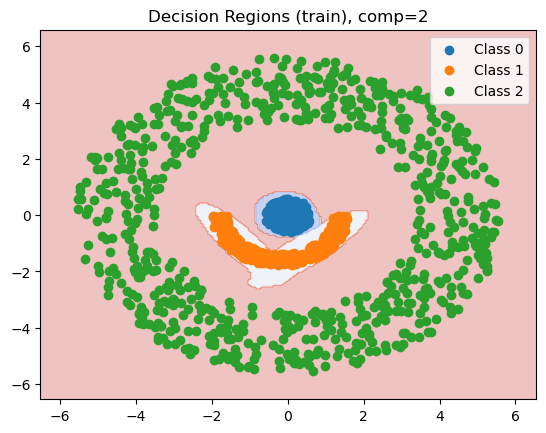

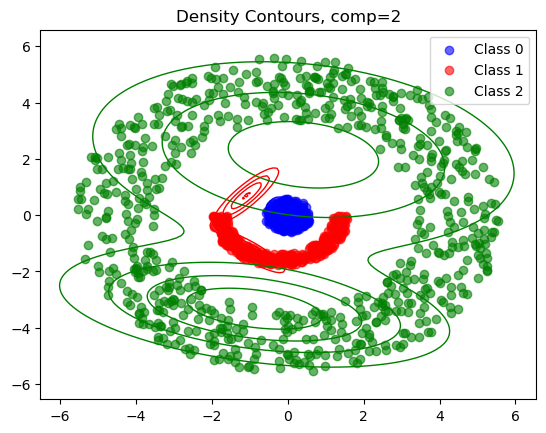

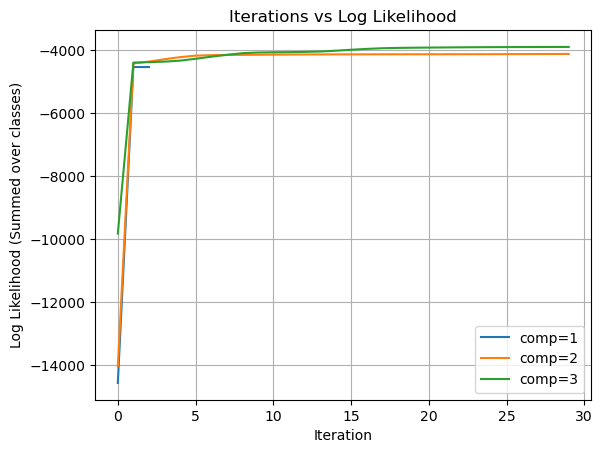

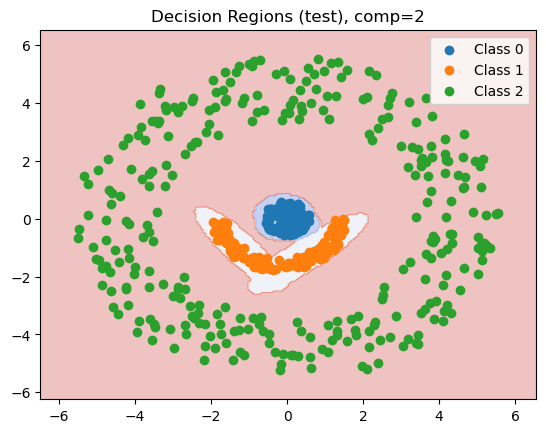

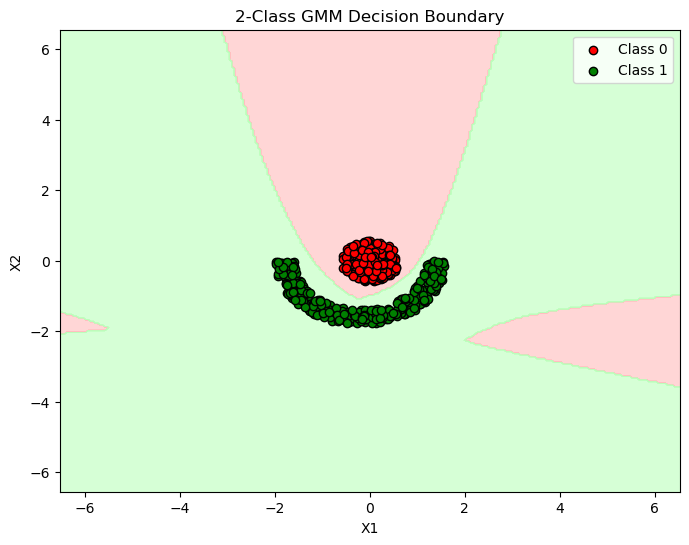

Best model metrics (on test data):
Accuracy: 1.0
Precision per class: {0: 1.0, 1: 1.0, 2: 1.0}
Recall per class: {0: 1.0, 1: 1.0, 2: 1.0}
F1 per class: {0: 1.0, 1: 1.0, 2: 1.0}
Mean Precision / Recall / F1: 1.0 1.0 1.0
Confusion matrix: {0: {0: 90, 1: 0, 2: 0}, 1: {0: 0, 1: 150, 2: 0}, 2: {0: 0, 1: 0, 2: 300}}

Generating 2-class decision boundaries for all 3 classes:


NameError: name 'gmm_em' is not defined

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from itertools import product
from collections import defaultdict

# ---------------------------------------------------
# Utility: Gaussian PDF (multivariate)
# ---------------------------------------------------
def gaussian_pdf(x, mean, cov):
    d = len(x)
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    diff = x - mean
    exponent = 0.0
    for i in range(d):
        for j in range(d):
            exponent += diff[i] * inv[i][j] * diff[j]
    denom = math.sqrt((2 * math.pi) ** d * det)
    return math.exp(-0.5 * exponent) / denom

# ---------------------------------------------------
# GMM with EM (for one class)
# Returns: means, covs, weights, log_likelihoods (list)
# ---------------------------------------------------
def train_gmm(X, n_components=2, max_iters=20, tol=1e-4, alpha=1.0):
    """
    X: array shape (n_samples, d)
    n_components: number of Gaussians
    max_iters: max EM iterations
    tol: tolerance for change in log likelihood
    alpha: smoothing / learning rate (1.0 means pure EM, <1.0 means smoothing)
    """
    n, d = X.shape

    # Initialize
    means = np.array([X[random.randint(0, n-1)] for _ in range(n_components)])
    covs = np.array([np.eye(d) for _ in range(n_components)])
    weights = np.array([1.0 / n_components] * n_components)

    log_likelihoods = []

    for it in range(max_iters):
        # E-step: responsibilities
        resp = np.zeros((n, n_components))
        for i in range(n):
            for k in range(n_components):
                resp[i, k] = weights[k] * gaussian_pdf(X[i], means[k], covs[k])
            s = np.sum(resp[i, :])
            if s == 0:
                # To avoid zero division, spread equally
                resp[i, :] = 1.0 / n_components
            else:
                resp[i, :] /= s

        # Compute log likelihood
        ll = 0.0
        for i in range(n):
            s = 0.0
            for k in range(n_components):
                s += weights[k] * gaussian_pdf(X[i], means[k], covs[k])
            ll += math.log(s + 1e-300)  # small epsilon to avoid log(0)
        log_likelihoods.append(ll)

        # M-step: update parameters
        new_means = []
        new_covs = []
        new_weights = []

        for k in range(n_components):
            r_k = resp[:, k]
            Nk = np.sum(r_k)
            if Nk < 1e-8:
                # reinitialize this component (rare)
                new_means.append(X[random.randint(0, n-1)])
                new_covs.append(np.eye(d))
                new_weights.append(1.0 / n)
                continue

            # mean
            m_k = np.sum(r_k.reshape(-1, 1) * X, axis=0) / Nk

            # covariance
            cov_k = np.zeros((d, d))
            for i in range(n):
                diff = (X[i] - m_k).reshape(d, 1)
                cov_k += r_k[i] * (diff @ diff.T)
            cov_k /= Nk

            w_k = Nk / n

            # apply smoothing / learning rate
            m_k = alpha * m_k + (1 - alpha) * means[k]
            cov_k = alpha * cov_k + (1 - alpha) * covs[k]
            w_k = alpha * w_k + (1 - alpha) * weights[k]

            new_means.append(m_k)
            new_covs.append(cov_k)
            new_weights.append(w_k)

        means = np.array(new_means)
        covs = np.array(new_covs)
        weights = np.array(new_weights)

        # check convergence
        if it > 0 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break

    return means, covs, weights, log_likelihoods

# ---------------------------------------------------
# Compute the likelihood of a point x under a class GMM
# ---------------------------------------------------
def gmm_likelihood(x, means, covs, weights):
    total = 0.0
    for k in range(len(means)):
        total += weights[k] * gaussian_pdf(x, means[k], covs[k])
    return total

# ---------------------------------------------------
# Bayes classifier for multi-class
# Train a GMM per class; compute posterior = prior * likelihood
# ---------------------------------------------------
def train_bayes_gmm(X_train, y_train, n_components=2, max_iters=20, alpha=1.0):
    classes = sorted(list(set(y_train)))
    n_classes = len(classes)
    class_data = {c: [] for c in classes}
    for i, y in enumerate(y_train):
        class_data[y].append(X_train[i])
    class_data = {c: np.array(class_data[c]) for c in classes}

    class_models = {}
    priors = {}
    log_likelihoods_all = {}  # store per class

    N = len(X_train)
    for c in classes:
        Xc = class_data[c]
        priors[c] = len(Xc) / N
        means, covs, weights, ll = train_gmm(Xc, n_components, max_iters, alpha=alpha)
        class_models[c] = (means, covs, weights)
        log_likelihoods_all[c] = ll

    return class_models, priors, log_likelihoods_all

def predict_bayes_gmm(X_test, class_models, priors):
    preds = []
    for x in X_test:
        post = {}
        for c, (means, covs, weights) in class_models.items():
            lik = gmm_likelihood(x, means, covs, weights)
            post[c] = lik * priors[c]
        # choose class with highest posterior
        pred = max(post.items(), key=lambda item: item[1])[0]
        preds.append(pred)
    return preds

# ---------------------------------------------------
# Metrics: confusion matrix, precision, recall, F1, etc.
# ---------------------------------------------------
def compute_metrics(y_true, y_pred):
    classes = sorted(list(set(y_true) | set(y_pred)))
    # confusion[c1][c2] = count true = c1, pred = c2
    confusion = {c1: {c2: 0 for c2 in classes} for c1 in classes}
    for yt, yp in zip(y_true, y_pred):
        confusion[yt][yp] += 1

    # compute per-class metrics
    precision = {}
    recall = {}
    f1 = {}
    for c in classes:
        tp = confusion[c][c]
        fp = sum(confusion[oth][c] for oth in classes if oth != c)
        fn = sum(confusion[c][oth] for oth in classes if oth != c)
        if tp + fp > 0:
            precision[c] = tp / (tp + fp)
        else:
            precision[c] = 0.0
        if tp + fn > 0:
            recall[c] = tp / (tp + fn)
        else:
            recall[c] = 0.0
        if precision[c] + recall[c] > 0:
            f1[c] = 2 * precision[c] * recall[c] / (precision[c] + recall[c])
        else:
            f1[c] = 0.0

    # mean metrics
    mean_precision = sum(precision.values()) / len(classes)
    mean_recall = sum(recall.values()) / len(classes)
    mean_f1 = sum(f1.values()) / len(classes)

    accuracy = sum(confusion[c][c] for c in classes) / len(y_true)

    return {
        "confusion": confusion,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "mean_precision": mean_precision,
        "mean_recall": mean_recall,
        "mean_f1": mean_f1
    }

# ---------------------------------------------------
# Plot decision boundary / decision regions for 2D
# ---------------------------------------------------
def plot_decision_regions(X, y, class_models, priors, grid_steps=200, title="Decision Regions"):
    # get bounds
    x_min, x_max = min(X[:,0]) - 1, max(X[:,0]) + 1
    y_min, y_max = min(X[:,1]) - 1, max(X[:,1]) + 1
    xx = np.linspace(x_min, x_max, grid_steps)
    yy = np.linspace(y_min, y_max, grid_steps)
    grid = np.array(list(product(xx, yy)))
    Z = []

    for pt in grid:
        post = {}
        for c, (means, covs, weights) in class_models.items():
            post[c] = gmm_likelihood(pt, means, covs, weights) * priors[c]
        pred = max(post.items(), key=lambda x: x[1])[0]
        Z.append(pred)

    Z = np.array(Z).reshape((grid_steps, grid_steps))

    plt.contourf(xx, yy, Z.T, alpha=0.3, cmap=plt.cm.coolwarm)
    # plot training points
    for c in sorted(set(y)):
        pts = X[np.array(y) == c]
        plt.scatter(pts[:,0], pts[:,1], label=f"Class {c}")
    plt.title(title)
    plt.legend()
    plt.show()

# ---------------------------------------------------
# Plot constant density contours for each class (training data overlapped)
# ---------------------------------------------------
def plot_density_contours(X_train, y_train, class_models, title="Density Contours"):
    plt.figure()
    colors = ['blue', 'red', 'green', 'purple', 'orange']
    classes = sorted(list(set(y_train)))
    # plot data
    for idx, c in enumerate(classes):
        pts = X_train[np.array(y_train) == c]
        plt.scatter(pts[:,0], pts[:,1], color=colors[idx], label=f"Class {c}", alpha=0.6)
    # contour for each class
    for idx, c in enumerate(classes):
        means, covs, weights = class_models[c]
        # Similar to earlier: make grid
        x_min, x_max = min(X_train[:,0]) - 1, max(X_train[:,0]) + 1
        y_min, y_max = min(X_train[:,1]) - 1, max(X_train[:,1]) + 1
        xx = np.linspace(x_min, x_max, 150)
        yy = np.linspace(y_min, y_max, 150)
        grid = np.array(list(product(xx, yy)))
        Z = np.zeros(len(grid))
        for k in range(len(means)):
            for i, gpt in enumerate(grid):
                Z[i] += weights[k] * gaussian_pdf(gpt, means[k], covs[k])
        Z = Z.reshape((150, 150))
        plt.contour(xx, yy, Z, levels=5, colors=colors[idx], linewidths=1)
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_2class_decision_boundary(X_train, y_train, model0, model1, prior0, prior1, title="2-Class GMM Decision Boundary"):
    """
    model0, model1: (means, covs, weights) for class 0 and class 1
    prior0, prior1: priors for class 0 and class 1
    """
    from matplotlib.colors import ListedColormap

    # Create grid
    h = 0.05
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict class for each point in grid
    Z = []
    for point in grid:
        p0 = gmm_likelihood(point, *model0) * prior0
        p1 = gmm_likelihood(point, *model1) * prior1
        Z.append(0 if p0 > p1 else 1)
    Z = np.array(Z).reshape(xx.shape)

    # Plot decision regions
    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB'])
    cmap_bold = ListedColormap(['red', 'green'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    # Plot training points
    for class_value, color in zip([0, 1], ['red', 'green']):
        idx = np.where(np.array(y_train) == class_value)
        plt.scatter(X_train[idx, 0], X_train[idx, 1], c=color, label=f"Class {class_value}", edgecolor='k')
    
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()


# ---------------------------------------------------
# Main driver: test on synthetic datasets, vary #components, record log-likelihoods
# ---------------------------------------------------
def main_demo():
    np.random.seed(0)
    random.seed(0)

    # Example: 3 classes in 2D
    mean_list = [[2, 2], [8, 2], [5, 7]]
    cov_list = [np.eye(2) * 1.0 for _ in mean_list]
    n_per_class = 100

    # Generate data
    X = []
    y = []
    for c in range(len(mean_list)):
        xs = np.random.multivariate_normal(mean_list[c], cov_list[c], n_per_class)
        X.append(xs)
        y += [c] * n_per_class
    X = np.vstack(X)
    y = list(y)

    # Shuffle
    perm = np.random.permutation(len(X))
    X = X[perm]
    y = [y[i] for i in perm]

    # Split train / test (80 / 20)
    split = int(0.8 * len(X))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]
    
    X_train, y_train, X_test, y_test, class_map = load_train_test_datasets(r'../../Dataset/Group04/NLS_Group04/')
    

    # Try different numbers of components
    comp_list = [1, 2, 3]
    all_models = {}
    metrics_results = {}
    ll_curves = {}

    for comp in comp_list:
        models, priors, ll_all = train_bayes_gmm(X_train, y_train, n_components=comp, max_iters=30, alpha=1.0)
        preds = predict_bayes_gmm(X_test, models, priors)
        metrics = compute_metrics(y_test, preds)
        all_models[comp] = (models, priors)
        metrics_results[comp] = metrics
        ll_curves[comp] = ll_all

        print("Components:", comp)
        print(" Accuracy:", metrics["accuracy"])
        print(" Precision:", metrics["precision"])
        print(" Recall:", metrics["recall"])
        print(" F1:", metrics["f1"])
        print(" Mean Precision / Recall / F1:", metrics["mean_precision"], metrics["mean_recall"], metrics["mean_f1"])
        print("Confusion Matrix:", metrics["confusion"])
        print("------")

    # Choose “best” model based on, say, mean F1 or accuracy
    best_comp = max(comp_list, key=lambda c: metrics_results[c]["mean_f1"])
    print("Best number of components:", best_comp)

    best_models, best_priors = all_models[best_comp]
    best_metrics = metrics_results[best_comp]

    # Plot decision regions (training data)
    plot_decision_regions(X_train, y_train, best_models, best_priors, title=f"Decision Regions (train), comp={best_comp}")

    # Plot density contours with training data
    plot_density_contours(X_train, y_train, best_models, title=f"Density Contours, comp={best_comp}")

    # Plot iteration vs log likelihood (take one class’s curve or averaged)
    plt.figure()
    for comp in comp_list:
        per_class_lls = ll_curves[comp]
        iters = min(len(ll) for ll in per_class_lls.values())  # get minimum iteration count
        combined_ll = [sum(per_class_lls[c][i] for c in per_class_lls) for i in range(iters)]
        plt.plot(combined_ll, label=f"comp={comp}")
    plt.xlabel("Iteration")
    plt.ylabel("Log Likelihood (Summed over classes)")
    plt.title("Iterations vs Log Likelihood")
    plt.legend()
    plt.grid(True)
    plt.show()


    # Finally: Evaluate on test set decision region plus test points
    plot_decision_regions(X_test, y_test, best_models, best_priors, title=f"Decision Regions (test), comp={best_comp}")
    
    
    
    
    models, priors, _ = train_bayes_gmm(X_train, y_train, n_components=2)
    model0 = models[0]  # (means, covs, weights)
    model1 = models[1]
    prior0 = priors[0]
    prior1 = priors[1]
    plot_2class_decision_boundary(X_train, y_train, model0, model1, prior0, prior1)
    # And optionally export metrics to file or print
    # Here we just print best metrics with confusion matrix
    print("Best model metrics (on test data):")
    print("Accuracy:", best_metrics["accuracy"])
    print("Precision per class:", best_metrics["precision"])
    print("Recall per class:", best_metrics["recall"])
    print("F1 per class:", best_metrics["f1"])
    print("Mean Precision / Recall / F1:", best_metrics["mean_precision"], best_metrics["mean_recall"], best_metrics["mean_f1"])
    print("Confusion matrix:", best_metrics["confusion"])

if __name__ == "__main__":
    main_demo()
    from itertools import combinations

    unique_classes = np.unique(y_train)
    print(f"\nGenerating 2-class decision boundaries for all {len(unique_classes)} classes:")

    for class0, class1 in combinations(unique_classes, 2):
        # Filter data for only class0 and class1
        indices = np.where((y_train == class0) | (y_train == class1))[0]
        X_pair = X_train[indices]
        y_pair = y_train[indices]

        # Relabel classes to class0 and class1 explicitly
        y_pair = np.array([class0 if y == class0 else class1 for y in y_pair])

        # Train GMMs for each class in this pair
        X0 = X_pair[y_pair == class0]
        X1 = X_pair[y_pair == class1]

        means0, covs0, weights0, _ = gmm_em(X0, n_components=2)
        means1, covs1, weights1, _ = gmm_em(X1, n_components=2)

        model0 = (means0, covs0, weights0)
        model1 = (means1, covs1, weights1)

        prior0 = len(X0) / len(X_pair)
        prior1 = len(X1) / len(X_pair)

        # Plot decision boundary
        plot_2class_decision_boundary(
            X_pair,
            np.array(y_pair),
            model0,
            model1,
            prior0,
            prior1,
            class_labels=[class0, class1],
            title=f"GMM Decision Boundary: Class {class0} vs Class {class1}"
        )



In [157]:
def plot_2class_decision_boundary(X_pair, y_pair, model0, model1, prior0, prior1, class_labels, title="2-Class GMM Decision Boundary"):
    from matplotlib.colors import ListedColormap

    h = 0.05
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    Z = []
    for point in grid:
        p0 = gmm_likelihood(point, *model0) * prior0
        p1 = gmm_likelihood(point, *model1) * prior1
        Z.append(class_labels[0] if p0 > p1 else class_labels[1])
    Z = np.array(Z).reshape(xx.shape)

    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB'])
    cmap_bold = ListedColormap(['red', 'green'])

    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    for class_value, color in zip(class_labels, ['red', 'green']):
        idx = np.where(y_pair == class_value)
        plt.scatter(X_pair[idx, 0], X_pair[idx, 1], c=color, label=f"Class {class_value}", edgecolor='k')
    
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()
